In [43]:
import wandb
import yaml
from utils import correct_type_of_entry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [23]:
dataset = "mnist"
sweep_config = "pretraining"
values_to_fetch = ['kl_bound', 'binomial_approximation_shah', 'p2l_bound', 'compression_set_size', 'validation_error', 'test_error']

sweep_config_name = "./configs/sweep_configs/" + sweep_config + ".yaml"
with open(sweep_config_name) as file:
    sweep_configuration = yaml.safe_load(file)
    
hps = {}
for key, item in sweep_configuration['parameters'].items():
    if item.get('values', None) is not None:
        hps[key] = correct_type_of_entry(item['values'])
size_hyperparams = tuple([len(l) for l in hps.values()])
hps['seed'] = [1]

In [24]:
api = wandb.Api()
entity = "mathieu-bazinet"
project = "sweep" + dataset
runs = api.runs(entity + "/" + project)

In [29]:
hps

{'seed': [1],
 'prior_size': [0.1, 0.2, 0.5],
 'pretraining_epochs': [50, 100],
 'pretraining_lr': [0.01, 0.001, 0.0001],
 'dropout_probability': [0.1, 0.2],
 'training_lr': [0.001, 0.005, 0.0001]}

In [25]:
results_matrix = np.ones(((len(values_to_fetch),) + size_hyperparams))

for run_idx in range(len(runs)):
    run = runs[run_idx]
    for val_to_fetch_idx in range(len(values_to_fetch)):
        if run.config['seed'] == 1:
            matrix_idx = tuple([val_to_fetch_idx] + [hps[key].index(run.config[key]) for key in hps.keys()])
            val_to_fetch = values_to_fetch[val_to_fetch_idx]
            results_matrix[matrix_idx] = run.summary[val_to_fetch]
from itertools import product

hp_list = list(hps.values())[1:]
params_product = list(product(*hp_list))
name_list = []
idx_list = []
for params in params_product:
    name = ""
    for p in params:
        name += str(p) + " "
    name_list.append(name[:-1])
    idx = ()
    for p_idx in range(len(params)):
        p_key = list(hps.keys())[1:][p_idx]
        idx += (hps[p_key].index(params[p_idx]),)
    idx_list.append(tuple(idx))

def different_length_means(list_of_list):
    mean_list = []
    for idx in range(max([len(l) for l in list_of_list])):
        count = 0
        somme = 0
        for l in list_of_list:
            if len(l) > idx:
                somme += l[idx]
                count += 1
        mean_list.append(somme/count)
    return np.array(mean_list)

In [44]:
# reshaped_matrix = results_matrix.mean(1).reshape(results_matrix.shape[0],np.prod(results_matrix.shape[2:])).T
reshaped_matrix = results_matrix[:,0,:,:,:,:,:].reshape(results_matrix.shape[0],np.prod(results_matrix.shape[2:])).T

mean_df = pd.DataFrame(reshaped_matrix, index=name_list, columns=values_to_fetch)
mean_df

,kl_bound,binomial_approximation_shah,p2l_bound,compression_set_size,validation_error,test_error
0.1 50 0.01 0.1 0.001,0.231200,0.231096,0.069583,3200.0,0.015415,0.015355
0.1 50 0.01 0.1 0.005,0.334035,0.333941,0.119897,5568.0,0.014393,0.015871
0.1 50 0.01 0.1 0.0001,0.188965,0.188858,0.052495,2400.0,0.016437,0.015427
0.1 50 0.01 0.2 0.001,0.231200,0.231096,0.069583,3200.0,0.018097,0.018850
0.1 50 0.01 0.2 0.005,0.350826,0.350733,0.129385,6016.0,0.020107,0.020723
0.1 50 0.01 0.2 0.0001,0.224768,0.224664,0.066853,3072.0,0.027034,0.027415
0.1 50 0.001 0.1 0.001,0.213231,0.213126,0.062072,2848.0,0.008245,0.009343
0.1 50 0.001 0.1 0.005,0.665055,0.664988,0.395172,18656.0,0.057130,0.063942
0.1 50 0.001 0.1 0.0001,0.114536,0.114421,0.027041,1216.0,0.010783,0.012526
0.1 50 0.001 0.2 0.001,0.219869,0.219764,0.064805,2976.0,0.007558,0.010195


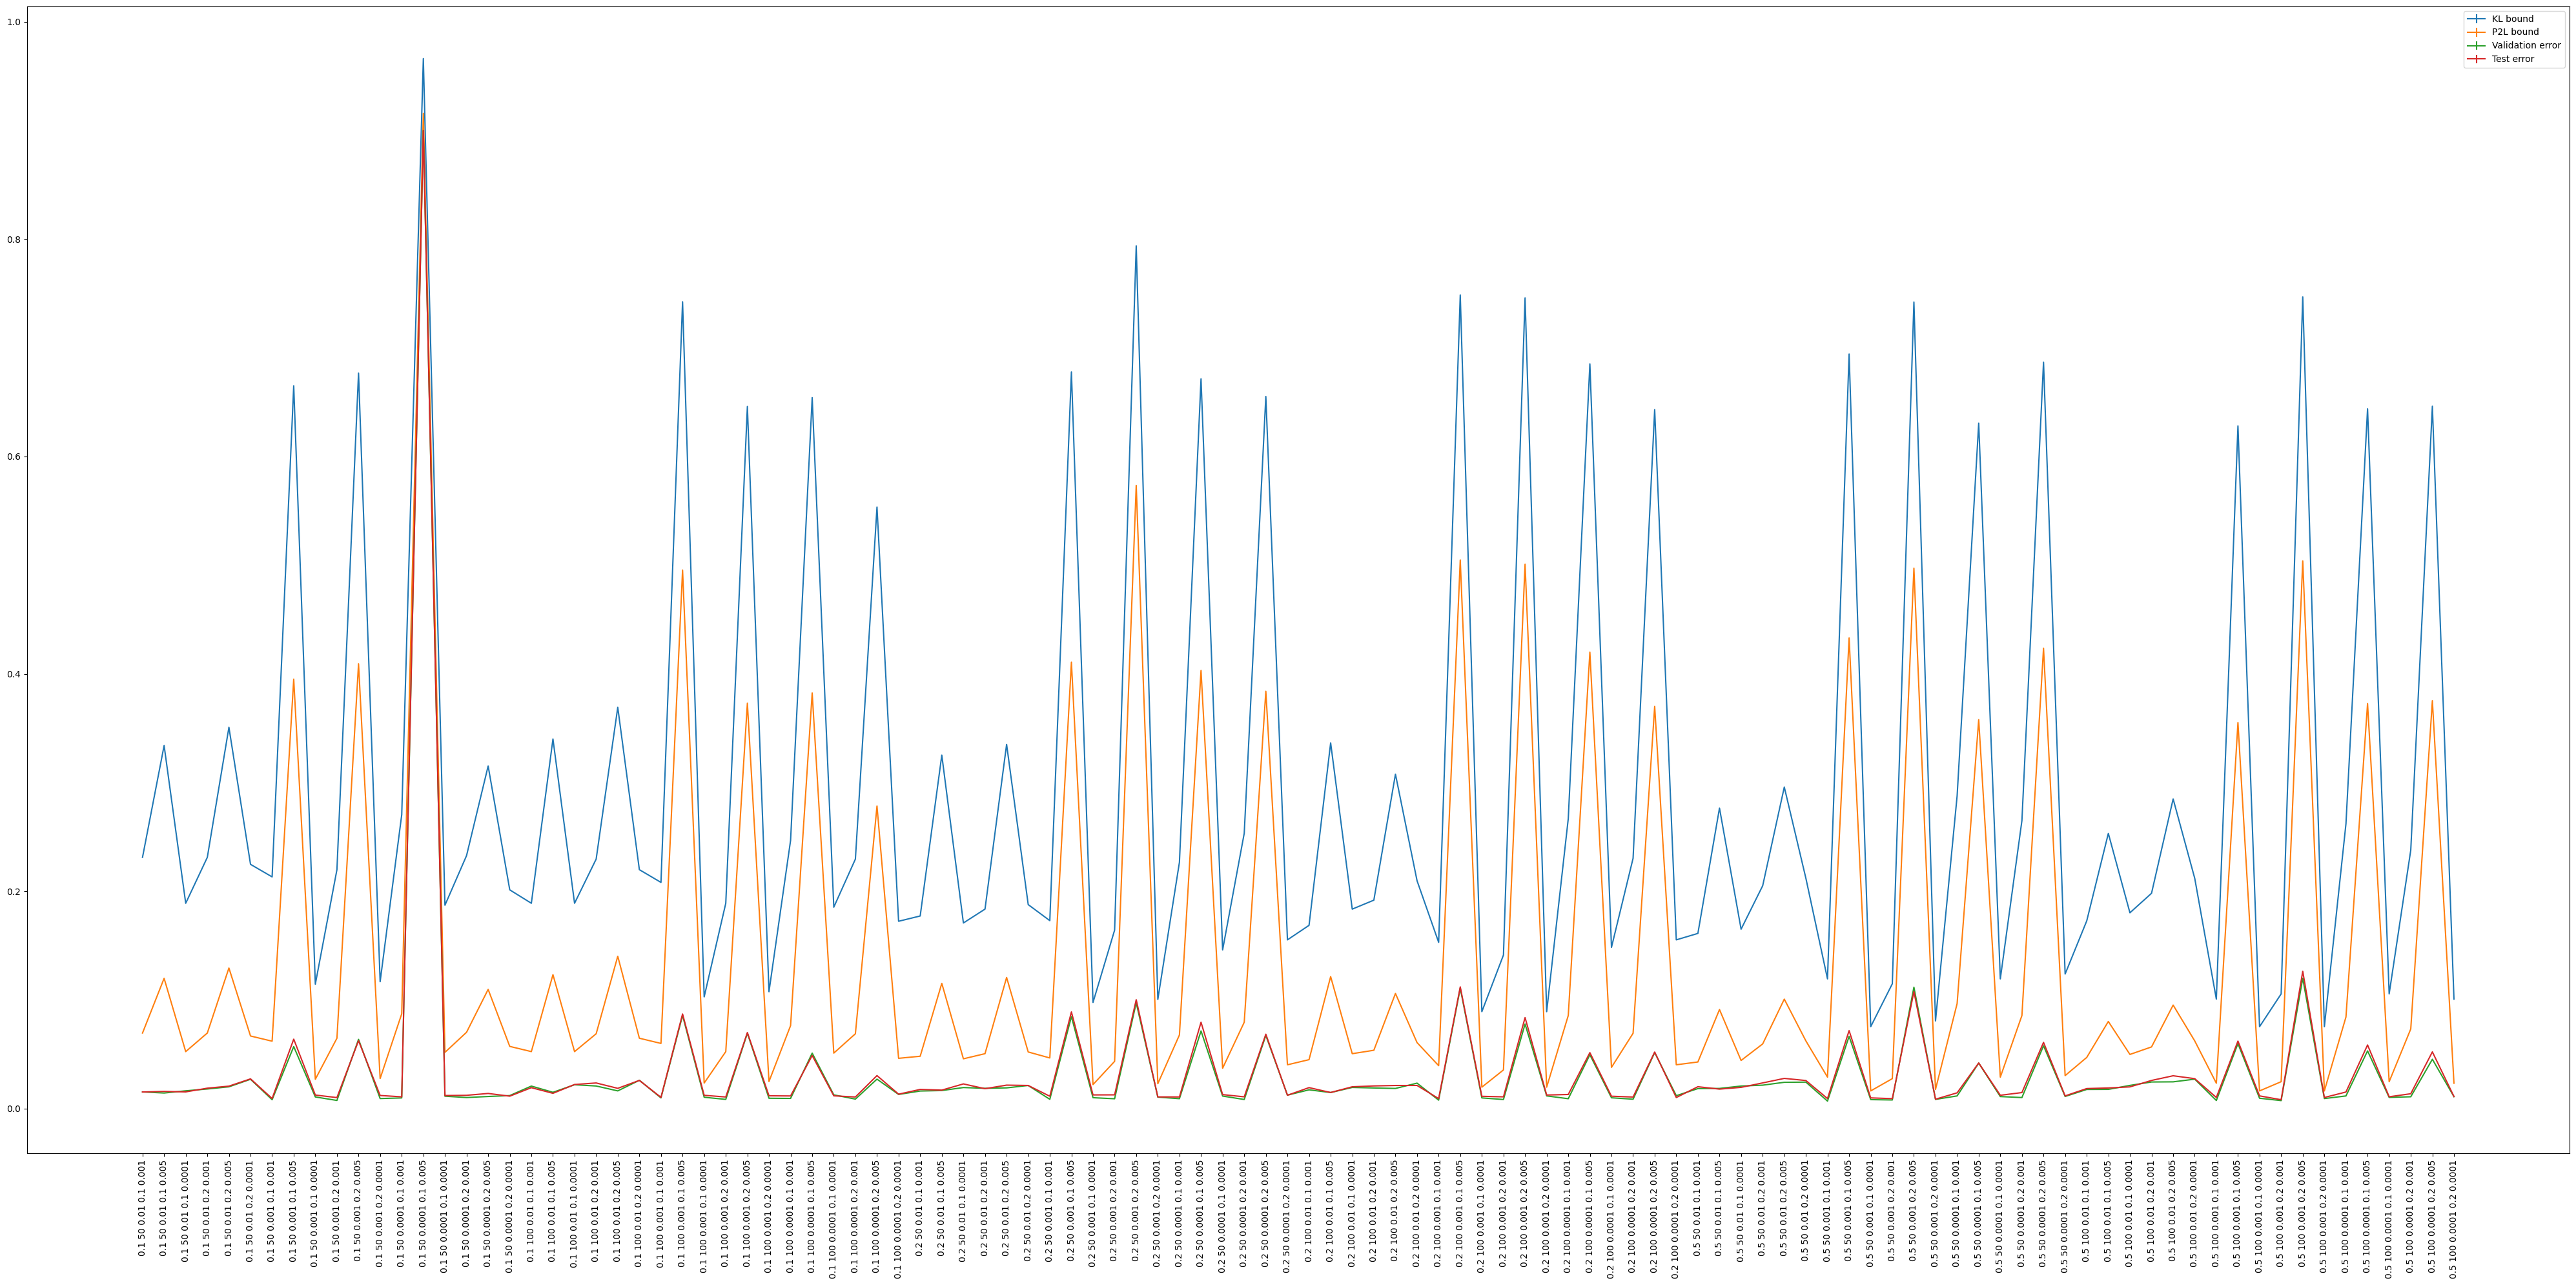

In [41]:
std_matrix = results_matrix.std(1).reshape(results_matrix.shape[0],np.prod(results_matrix.shape[2:])).T
std_matrix = np.zeros(std_matrix.shape)
std_df = pd.DataFrame(std_matrix, index=name_list, columns=values_to_fetch)

plt.figure(figsize=(40,20))
plt.errorbar(x=name_list,
             y=mean_df['kl_bound'],
             yerr=std_df['kl_bound'],
             # marker="o",
             label="KL bound")
plt.errorbar(x=name_list,
             y=mean_df['p2l_bound'],
             yerr=std_df['p2l_bound'],
             # marker="o",
             label="P2L bound")
plt.errorbar(x=name_list,
             y=mean_df['validation_error'],
             yerr=std_df['validation_error'],
             # marker="o",
             label="Validation error")
plt.errorbar(x=name_list,
             y=mean_df['test_error'],
             yerr=std_df['test_error'],
             # marker="o",
             label="Test error")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig(f"./results/{dataset}_comparison_of_bounds.jpg")

In [36]:
results_matrix[:,0,:,:,:,:,:]

array([[[[[[2.31200012e-01, 3.34035103e-01, 1.88965433e-01],
           [2.31200012e-01, 3.50826344e-01, 2.24768435e-01]],

          [[2.13231376e-01, 6.65054723e-01, 1.14535839e-01],
           [2.19869093e-01, 6.76757791e-01, 1.16811388e-01]],

          [[2.70501879e-01, 9.66066237e-01, 1.87165308e-01],
           [2.32790428e-01, 3.15243305e-01, 2.01308989e-01]]],


         [[[1.88965433e-01, 3.40111132e-01, 1.88965433e-01],
           [2.29602684e-01, 3.69215726e-01, 2.19869093e-01]],

          [[2.08170922e-01, 7.42336034e-01, 1.02859986e-01],
           [1.88965433e-01, 6.45992645e-01, 1.07592196e-01]],

          [[2.46805041e-01, 6.54183262e-01, 1.85355599e-01],
           [2.29602684e-01, 5.53464928e-01, 1.72407002e-01]]]],



        [[[[1.77272749e-01, 3.25242548e-01, 1.70836709e-01],
           [1.83586563e-01, 3.35130346e-01, 1.87730943e-01]],

          [[1.72996043e-01, 6.77736045e-01, 9.77422306e-02],
           [1.64271624e-01, 7.93748249e-01, 1.00511783e-01]],

  